# Machine Learning - Semana 2

**Tarefas e experimentos de Aprendizado de Máquina**

**Tutor:** Fernando Pereira dos Santos

# Tarefas com aprendizado supervisionado:


**Classificação:** Dado um conjunto de observações $D = \{{X, Y}\}$, temos uma função $f()$ que mapeia uma entrada $X_i$ (conjunto de atributos) à sua respectiva saída $Y_i$. Assim, $f(x)$ aprende a aproximação que permite estimar $y$ (classes pré-definidas) para os valores de $x$.

*   A função $f()$ é um classificador que fornece probabilidades (score) dos dados de entrada nas possíveis saídas (classes);
*   $y$ será um valor inteiro pertencente à $Y$;
*   a métrica mais utilizada é a acurácia (taxa de acerto);
*   Exemplos: {benigno, maligno}, {cachorro, gato}, {bom pagador, mal pagador}.

---

**Regressão:** Dado um conjunto de observações $D = \{{X, Y}\}$, temos uma função $f()$ que mapeia uma entrada $X_i$ (conjunto de atributos) à sua respectiva saída $y_i$. Assim, $f(x)$ aprende a aproximação que permite estimar $y$ (valores continuos) para os valores de $x$.

*   A função $f()$ é um regressor;
*   $y$ será um valor real;
*   Exemplos: peso, temperatura, demanda.

---

**Exemplos de técnicas:**
- KNN (proximidade)
- SVM (otimização)
- Árvores de decisão (lógico)
- Naive Bayes (probabilístico)
- Redes Neurais (otimização)


# Tarefas com aprendizado não supervisionado

Técnicas de agrupamento, ou clustering, é o nome dado para o **grupo de técnicas computacionais cujo propósito consiste em separar objetos em grupos**, baseando-se nas características que estes objetos possuem. 

A ideia básica consiste em colocar em um mesmo grupo **objetos que sejam similares de acordo com algum critério pré-determinado:**

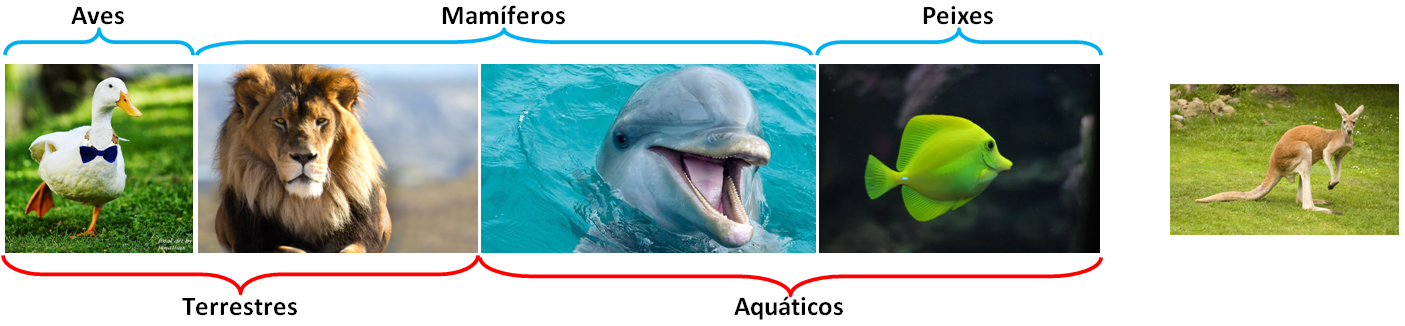

**Como definir o critério de agrupamento?**

- o critério baseia-se em uma **medida de similaridade ou dissimilaridade**, que recebe dois objetos e retorna a distância entre eles;
- os grupos determinados por uma métrica de qualidade devem apresentar **alta homogeneidade interna e alta heterogeneidade externa**, ou seja, os elementos de um determinado conjunto devem ser mutuamente similares e, preferencialmente, muito diferentes dos elementos de outros conjuntos:
  * maximizar a distância entre grupos ($L$ - inter-cluster distance);
  * minimizar a distância no grupo ($d$ - intra-cluster distance).

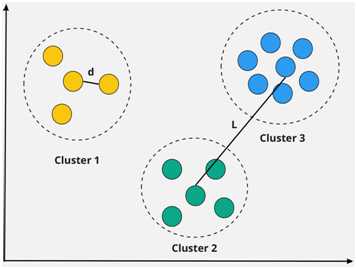

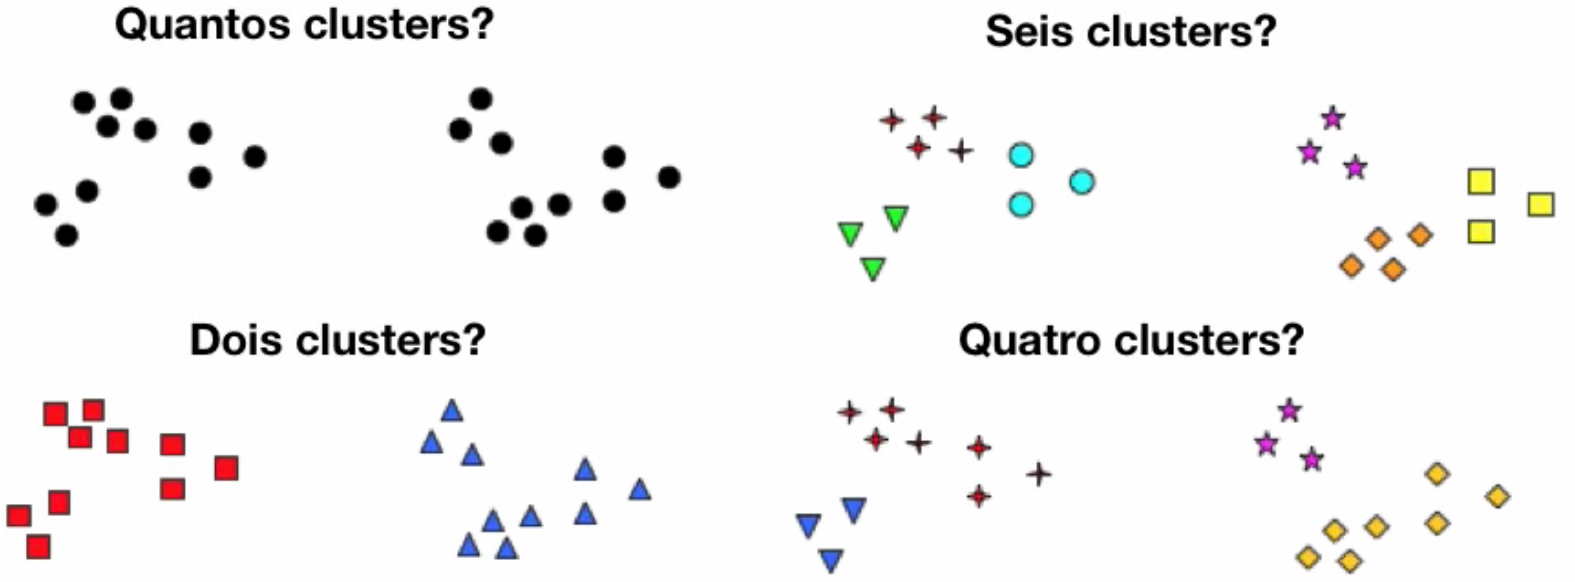

---

**Exemplos de técnicas:**
- K-Means (grupos únicos)
- K-Medoids (grupos únicos)
- Fuzzy C-Means (graus de pertinência)

# Exemplo prático de uma tarefa de detecção de anomalias com One-class SVM:

**Detecção de anomalias objetiva verificar se uma instância possui comportamento normal ou anômalo.**

No conjunto de treinamento temos apenas exemplos normais e no conjunto de teste ambas possibilidades.

**Exemplo:** considere o cenário de uma câmera de vigilância.
- Comportamento normal: área vazia (somente paredes, pássaros, chuva, etc)
- Comportamento anormal: presença de pessoas estranhas

Este tipo de tarefa pode ser modelada como detecção de outliers:
- Disciplina de Técnicas Avançadas de Captura e Tratamento de Dados (Semana 2)

In [ ]:
# carregando o dataset
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# lendo dados da iris: em https://scikit-learn.org/stable/datasets.html temos diversos datasets diferentes para estudo.
iris = load_iris()
X = iris.data
Y = iris.target

print("Conjunto de dados", X.shape)
print("Conjunto de rótulos", Y.shape)
print("Quantidade distintos de rótulos", np.unique(Y))
print("\nPrimeira instância", X[0])
print("Primeiro rótulo", Y[0])

pandasX = pd.DataFrame(X)
print("Numpy to dataframe",pandasX.shape)
pandasX = pandasX.drop([2,3], axis=1)
print("Dataframe",pandasX.shape)

pandasY = pd.DataFrame(Y)
pandasData = pd.concat([pandasX,pandasY], axis=1)

symbols = ['Feat1', 'Feat2', 'Label']
pandasData.columns = symbols

print("Shape",pandasData.shape)
print(pandasData.head())

normalX = pandasData[pandasData['Label']==0]
anomalyX = pandasData[pandasData['Label']!=0]

trainX = normalX[['Feat1', 'Feat2']]
trainY = normalX[['Label']]
testX = anomalyX[['Feat1', 'Feat2']]
testY = anomalyX[['Label']]

trainX = trainX.to_numpy()
trainY = trainY.to_numpy()
testX = testX.to_numpy()
testY = testY.to_numpy()

print("X train", trainX.shape)
print("X test", testX.shape)

Conjunto de dados (150, 4)
Conjunto de rótulos (150,)
Quantidade distintos de rótulos [0 1 2]

Primeira instância [5.1 3.5 1.4 0.2]
Primeiro rótulo 0
Numpy to dataframe (150, 4)
Dataframe (150, 2)
Shape (150, 3)
   Feat1  Feat2  Label
0    5.1    3.5      0
1    4.9    3.0      0
2    4.7    3.2      0
3    4.6    3.1      0
4    5.0    3.6      0
X train (50, 2)
X test (100, 2)


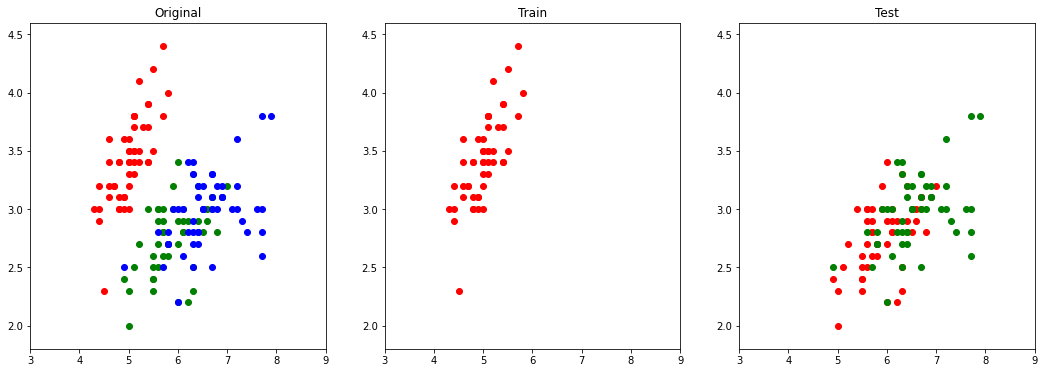

In [ ]:
plt.figure(figsize=(18, 6))
colors = ['red','green','blue']

plt.subplot(1, 3, 1)
plt.title("Original")
plt.axis([3, 9, 1.8, 4.6])
for i in range (0, X.shape[0]):
    plt.scatter(X[i][0], X[i][1], c=colors[Y[i]])

plt.subplot(1, 3, 2)
plt.title("Train")
plt.axis([3, 9, 1.8, 4.6])
for i in range (0, trainX.shape[0]):
    plt.scatter(trainX[i][0], trainX[i][1], c=colors[Y[i]])

plt.subplot(1, 3, 3)
plt.title("Test")
plt.axis([3, 9, 1.8, 4.6])
for i in range (0, testX.shape[0]):
    plt.scatter(testX[i][0], testX[i][1], c=colors[Y[i]])

In [ ]:
from sklearn import svm

#kernel gaussiano
clf = svm.OneClassSVM(kernel='rbf').fit(trainX)
pred = clf.predict(testX)
print(pred)

print("Total de anomalias:", np.count_nonzero(pred == -1))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
Total de anomalias: 100


In [ ]:
clf = svm.OneClassSVM(kernel='linear').fit(trainX)
pred = clf.predict(testX)
print(pred)

print("Total de anomalias:", np.count_nonzero(pred == -1))

[ 1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1
 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
Total de anomalias: 12


#Algoritmos de Aprendizado de Máquina:

Os dados devem ser:
- estruturados;
- representativos;
- de boa qualidade;

**E quando os dados não são estruturados, como as imagens?**

---

**Viés indutivo:** tendência a privilegiar uma ou mais hipóteses que atendam a um dado critério
- preferência ou busca:
  - define como as hipóteses são pesquisadas;
  - complexidade das possíveis funções;
- representação:
  - define o espaço de busca das hipóteses;
  - exemplo: formato de árvores de decisão.

Fontes de erros:
- viés: 
  - quando o algoritmo não aprende um modelo adequado;
  - quanto maior o viés, mais simples a hipótese induzida;
  - associado ao underfitting;
- variância:
  - quando o algoritmo presta atenção a detalhes sem importância;
  - pequenas mudanças nos dados de treinamento alteram o modelo gerado;
  - associado ao overfitting;

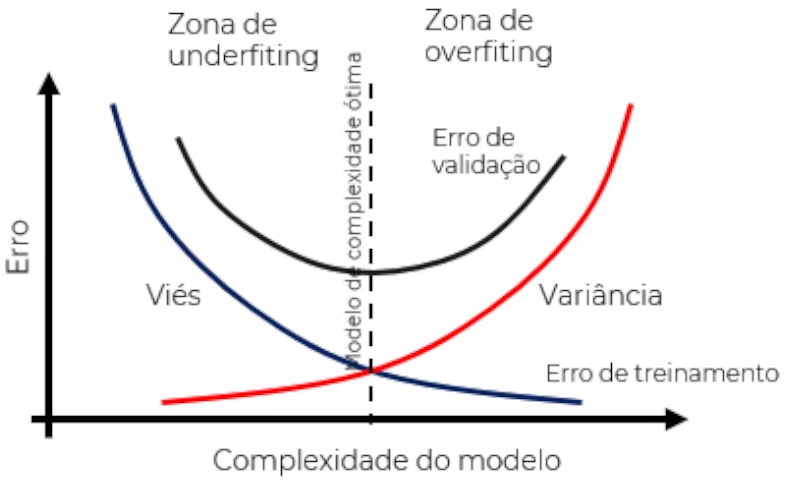